# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

**Importing libraries**

In [2]:
import string
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import missingno as msno
from nltk.corpus import stopwords
from datetime import date, datetime
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

**Restaurent names dataframe**

In [3]:
#loading the zomato restaurant dataset 
names_df = pd.read_csv('Zomato Restaurant names and Metadata.csv')
reviews_df = pd.read_csv('Zomato Restaurant reviews.csv')
print('Restaurent names dataframe:')
names_df.head()

Restaurent names dataframe:


,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [4]:
#shape and size of the dataset
names_df.shape

(105, 6)

**Restaurent reviews dataframe**

In [5]:
#loading the restaurant reviews dataset
print('Restaurent reviews dataframe:')
reviews_df.head()

Restaurent reviews dataframe:


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


**Restaurent reviews data cleaning**

In [6]:
#shape and size of dataset
reviews_df.shape

(10000, 7)

In [7]:
#columns in the reviews dataset
reviews_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [8]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


**Showing the presence of NaN values**

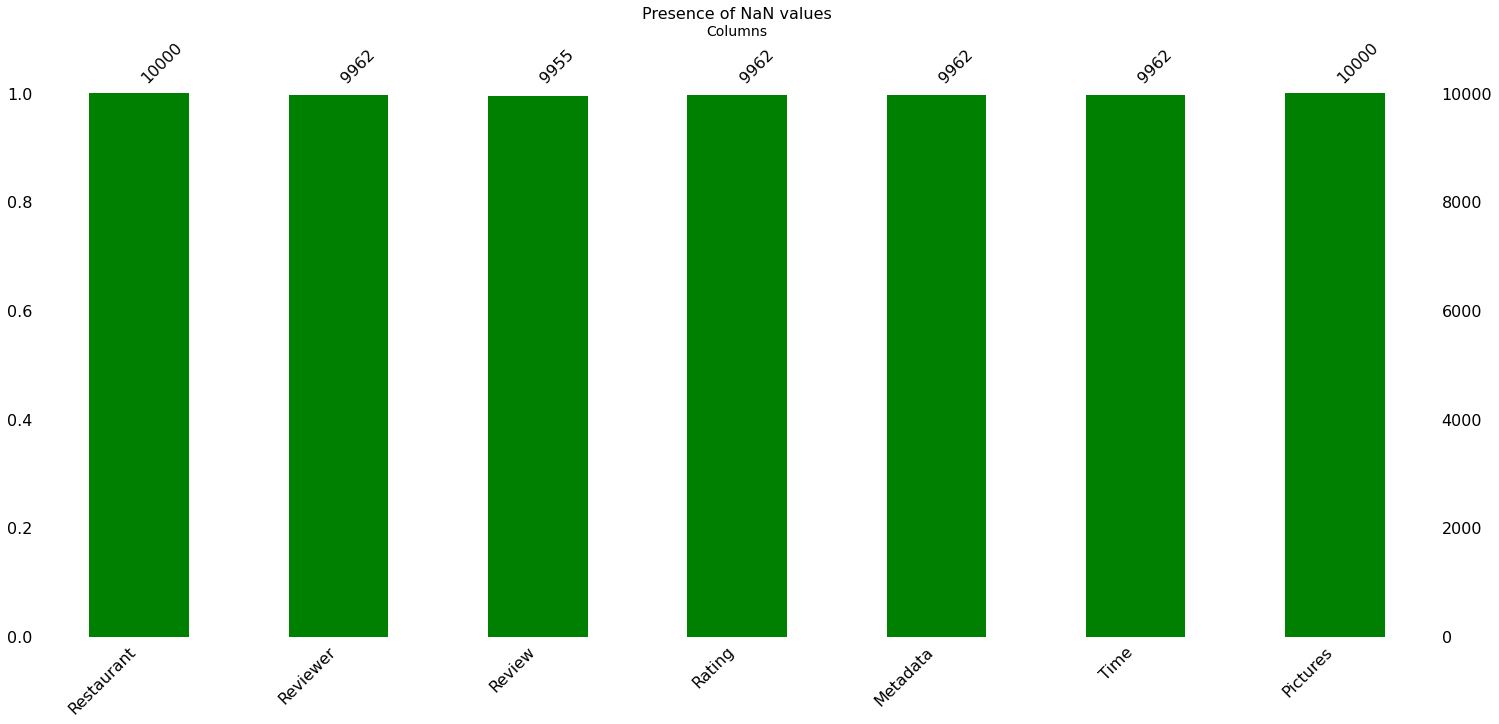

In [9]:
#checking for null values
msno.bar(reviews_df, color='green')
plt.title('Presence of NaN values', size=16)
plt.xlabel('Columns', size=14)
plt.show()

**Number of unique values**

In [10]:
#number of unique values in reviews dataset
reviews_df.nunique()

Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64

**Restaurant Ratings**

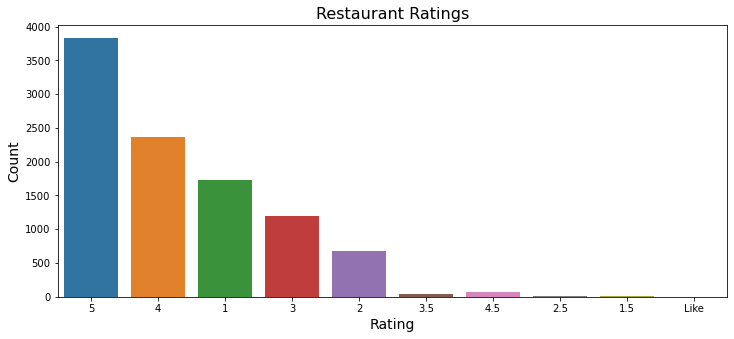

In [11]:
#plotting the value counts of Restaurant ratings
plt.figure(figsize=(12, 5))
sns.countplot(reviews_df.Rating)
plt.title('Restaurant Ratings', size=16)
plt.xlabel('Rating', size=14)
plt.ylabel('Count', size=14)
plt.show()

In [12]:
#removing the chategorical data
reviews_df = reviews_df[reviews_df['Rating']!='Like']

In [13]:
#converting the rating datatype to numerical values
reviews_df['Rating'] = reviews_df['Rating'].astype(float)

In [14]:
#information of dataframe after the conversion
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9999 non-null   object 
 1   Reviewer    9961 non-null   object 
 2   Review      9954 non-null   object 
 3   Rating      9961 non-null   float64
 4   Metadata    9961 non-null   object 
 5   Time        9961 non-null   object 
 6   Pictures    9999 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 624.9+ KB


In [15]:
#dropping the null values
reviews_df.dropna(inplace=True)

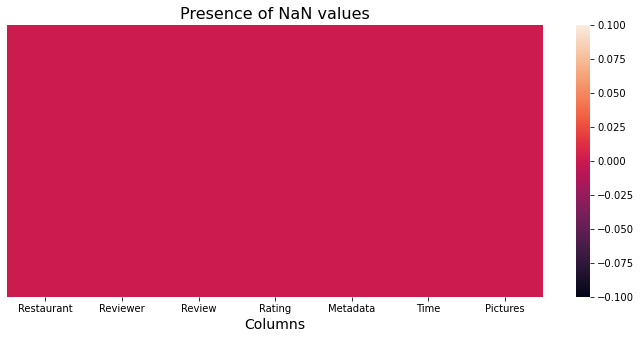

In [16]:
#heatmap of data frame
plt.figure(figsize=(12, 5))
sns.heatmap(reviews_df.isnull(), yticklabels=False)
plt.title('Presence of NaN values', size=16)
plt.xlabel('Columns', size=14)
plt.show()

In [17]:
#converting the datatype of metadata
reviews_df['Metadata'] = reviews_df['Metadata'].astype(str)

In [18]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [19]:
#separating the data contained in the metadata column
reviews_df['Reviewrs'], reviews_df['Followers'] = reviews_df['Metadata'].str.split(',').str

In [20]:
#separating the numerical data contained in columns
reviews_df['Reviewrs'] = pd.to_numeric(reviews_df['Reviewrs'].str.split(' ').str[0])
reviews_df['Followers'] = pd.to_numeric(reviews_df['Followers'].str.split(' ').str[1])

In [21]:
#dropping the column
reviews_df.drop('Metadata', axis=1, inplace=True)
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviewrs,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0,1,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0,3,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0,2,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0,1,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0,3,2.0


In [22]:
#changing the datetime format
reviews_df['Time'] = pd.to_datetime(reviews_df['Time'])

In [23]:
#inserting new columns
reviews_df['Date'] = reviews_df['Time'].dt.day
reviews_df['Month'] = reviews_df['Time'].dt.month
reviews_df['Year'] = reviews_df['Time'].dt.year
reviews_df['Day'] = reviews_df['Time'].dt.day_name()
reviews_df['Hour'] = reviews_df['Time'].dt.hour

In [24]:
#dataframe after inserssion of columns
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviewrs,Followers,Date,Month,Year,Day,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2.0,25,5,2019,Saturday,15
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2.0,25,5,2019,Saturday,14
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,3.0,24,5,2019,Friday,22
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1,1.0,24,5,2019,Friday,22
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0,3,2.0,24,5,2019,Friday,21


In [25]:
#dropping the datetime column
reviews_df.drop('Time', axis=1, inplace=True)
#checking for unique values in year feature
reviews_df['Year'].unique()

array([2019, 2018, 2017, 2016], dtype=int64)

**Data Visualization**

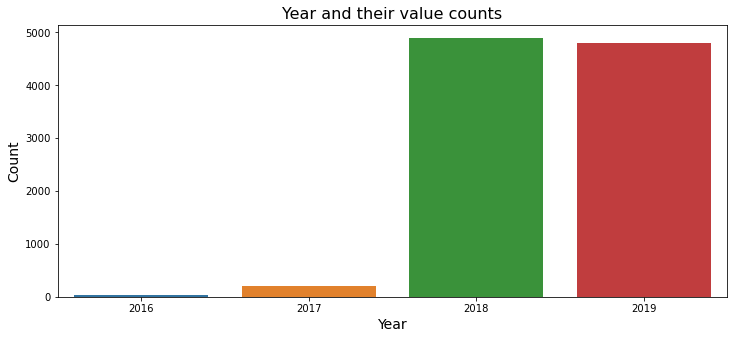

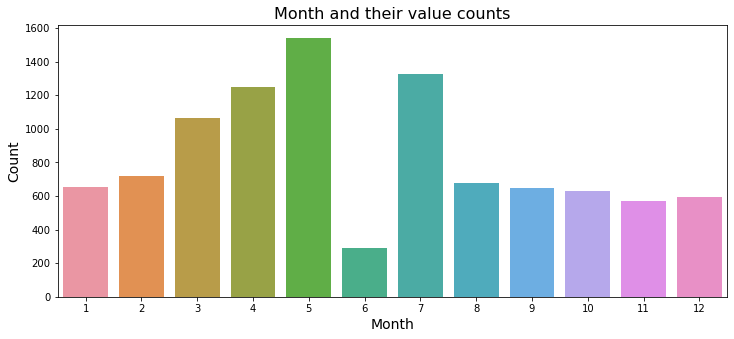

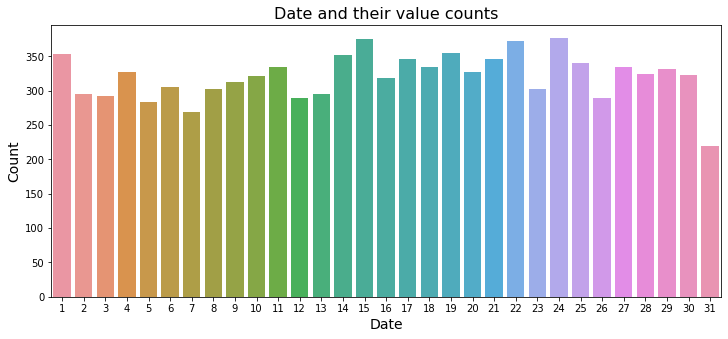

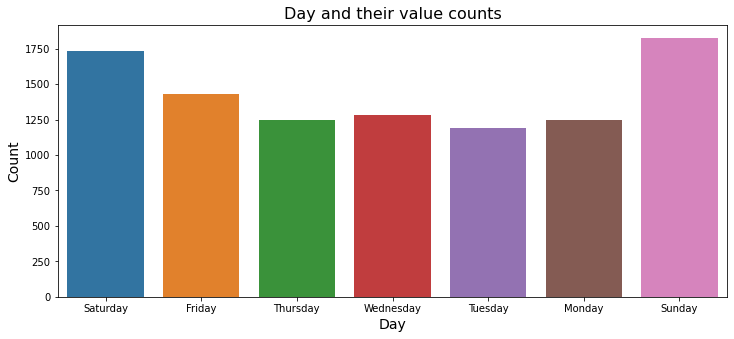

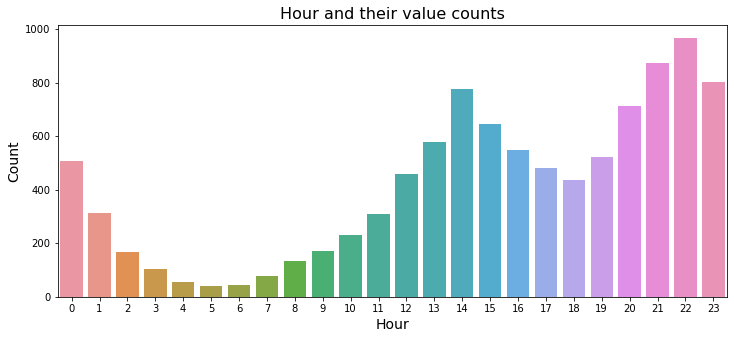

In [26]:
features = ['Year', 'Month', 'Date', 'Day', 'Hour']

for col in features:
    fig = plt.figure(figsize=(12, 5))
    ax = fig.gca()
    sns.countplot(reviews_df[col], ax=ax)
    plt.title(f'{col} and their value counts', size=16)
    plt.xlabel(col, size=14)
    plt.ylabel('Count', size=14)
    plt.show()

**Restaurants and Ratings**

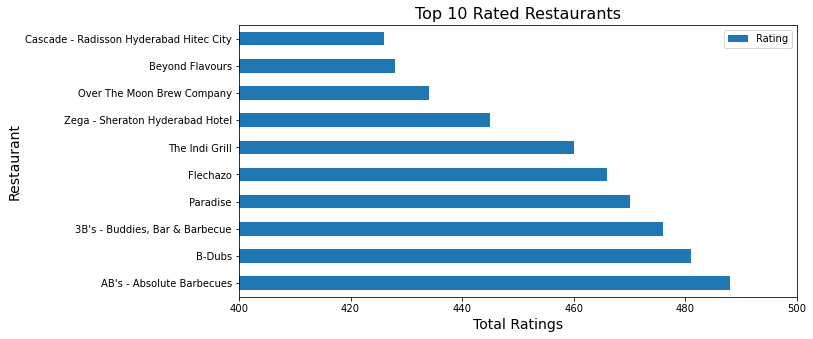

In [27]:
#data of restaurants
top_restaurants = reviews_df.groupby('Restaurant').agg({'Rating':'sum'}).sort_values(by='Rating',ascending=False)
#top 10 restaurants
top_10 = top_restaurants[:10]
#plotting the data of top 10 restaurants
top_10.plot(kind='barh', xlim=(400, 500), figsize=(10, 5))
plt.title('Top 10 Rated Restaurants', size=16)
plt.ylabel('Restaurant', size=14)
plt.xlabel('Total Ratings', size=14)
plt.show()

In [28]:
top_restaurants.shape

(100, 1)

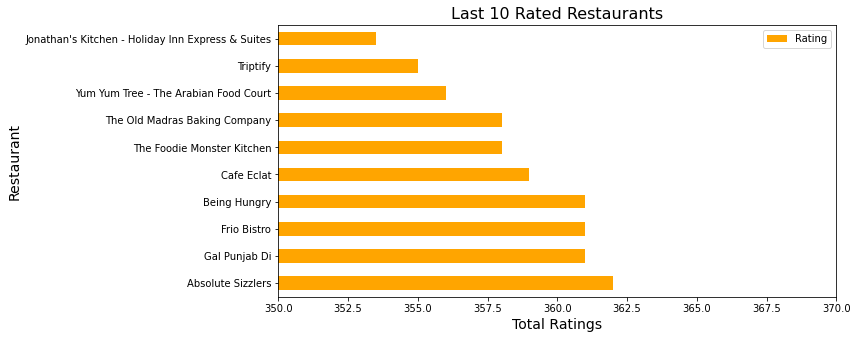

In [29]:
#average rated restaurants
avg_rated = top_restaurants[45:55]
avg_rated.plot(kind='barh', xlim=(350, 370), figsize=(10, 5), color='orange')
plt.title('Last 10 Rated Restaurants', size=16)
plt.ylabel('Restaurant', size=14)
plt.xlabel('Total Ratings', size=14)
plt.show()

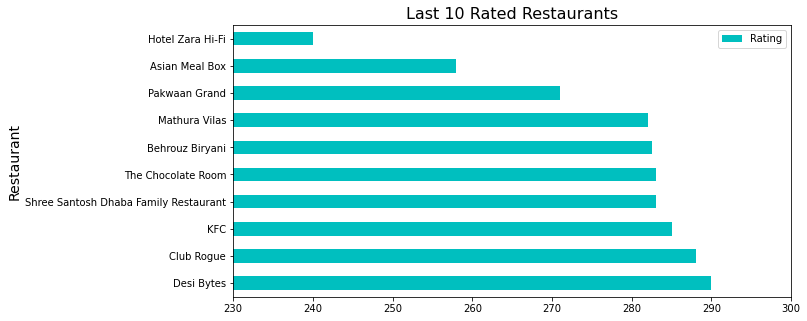

In [30]:
#least 10 restaurants
last_10 = top_restaurants[-10:]
last_10.plot(kind='barh', xlim=(230, 300), figsize=(10, 5), color='c')
plt.title('Last 10 Rated Restaurants', size=16)
plt.ylabel('Restaurant', size=14)
plt.show()

**Restaurants and Followers**

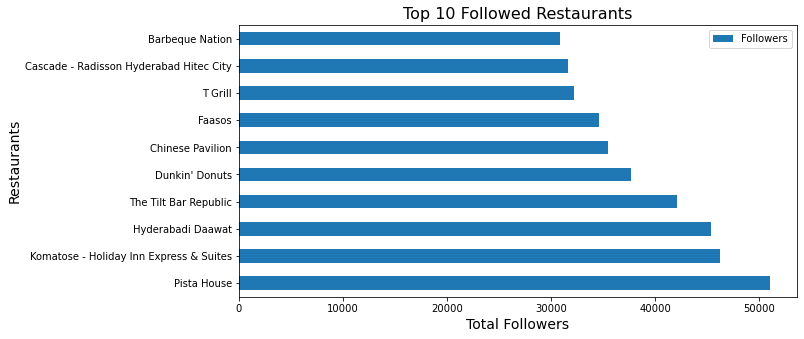

In [31]:
#data of restaurants
followed_restaurants = reviews_df.groupby('Restaurant').agg({'Followers':'sum'}).sort_values(by='Followers',ascending=False)
#top 10 restaurants
top_10 = followed_restaurants[:10]
top_10.plot(kind='barh',  figsize=(10, 5))
plt.title('Top 10 Followed Restaurants', size=16)
plt.ylabel('Restaurants', size=14)
plt.xlabel('Total Followers', size=14)
plt.show()

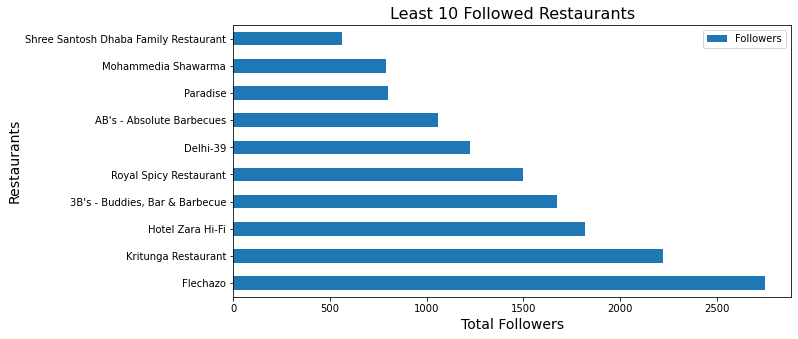

In [32]:
least_10 = followed_restaurants[-10:]
least_10.plot(kind='barh',  figsize=(10, 5))
plt.title('Least 10 Followed Restaurants', size=16, )
plt.ylabel('Restaurants', size=14)
plt.xlabel('Total Followers', size=14)
plt.show()

**Pictures Posted**

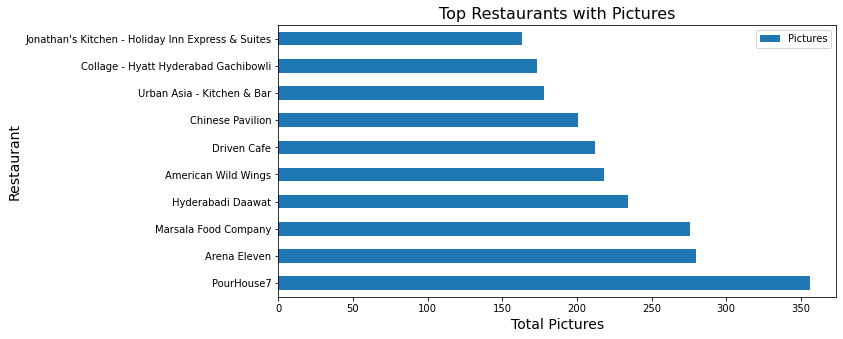

In [33]:
#data of restaurants with pictures
pic_restaurants = reviews_df.groupby('Restaurant').agg({'Pictures':'sum'}).sort_values(by='Pictures',ascending=False)
#top 10 restaurants
top = pic_restaurants.head(10)
#plotting the data of top 10 restaurants
top.plot(kind='barh', figsize=(10, 5))
plt.title('Top Restaurants with Pictures', size=16)
plt.ylabel('Restaurant', size=14)
plt.xlabel('Total Pictures', size=14)
plt.show()

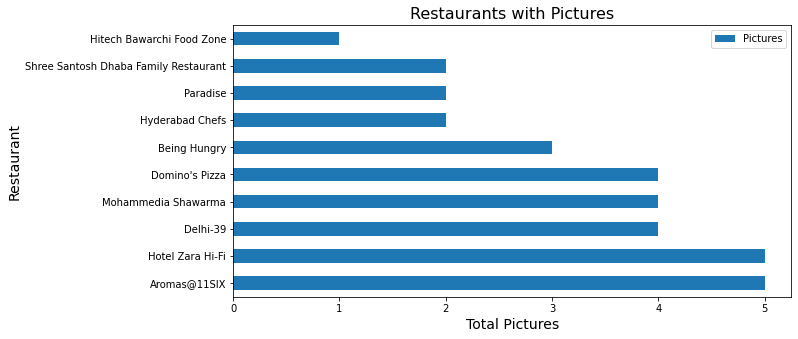

In [34]:
least = pic_restaurants.tail(10)
#plotting the data of top 10 restaurants
least.plot(kind='barh', figsize=(10, 5))
plt.title('Restaurants with Pictures', size=16)
plt.ylabel('Restaurant', size=14)
plt.xlabel('Total Pictures', size=14)
plt.show()

**Reviewrs and Followers**

In [35]:
#finding the total number of reviewrs and followers
ratings = reviews_df.groupby('Rating').agg({'Reviewrs':sum, 'Followers':sum})
ratings

,Reviewrs,Followers
Rating,,
1.0,13165,84228.0
1.5,457,3381.0
2.0,15234,99521.0
2.5,985,4997.0
3.0,47320,276104.0
3.5,5289,25045.0
4.0,101115,679406.0
4.5,4067,34892.0
5.0,51343,416146.0


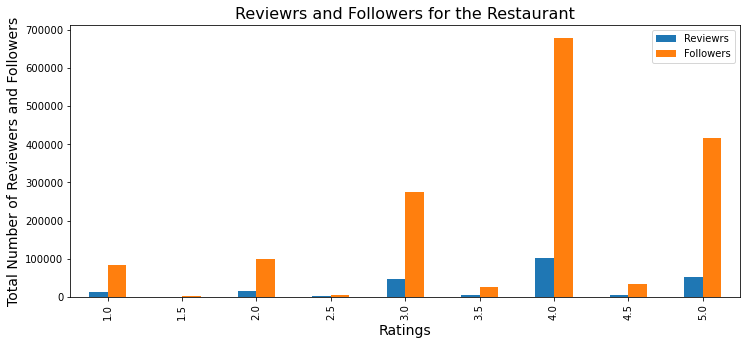

In [36]:
#plotting the data of ratings
ratings.plot(kind='bar', figsize=(12, 5))
plt.title('Reviewrs and Followers for the Restaurant', size=16)
plt.xlabel('Ratings', size=14)
plt.ylabel('Total Number of Reviewers and Followers', size=14)
plt.show()

**Reviewers**

In [37]:
#gathering the data of reviewers
top_reviewers = reviews_df.groupby('Reviewer').agg({'Rating':'sum'}).sort_values(by='Rating',ascending=False)
top_10 = top_reviewers[:10]
top_10

,Rating
Reviewer,
Kiran,54.0
Ankita,51.0
Vedant Killa,44.0
Kumar,42.0
Parijat Ray,41.5
Jay Mehta,41.0
Sravani,40.0
Prachita Jayaswal,39.0
Aman Agarwal,38.0


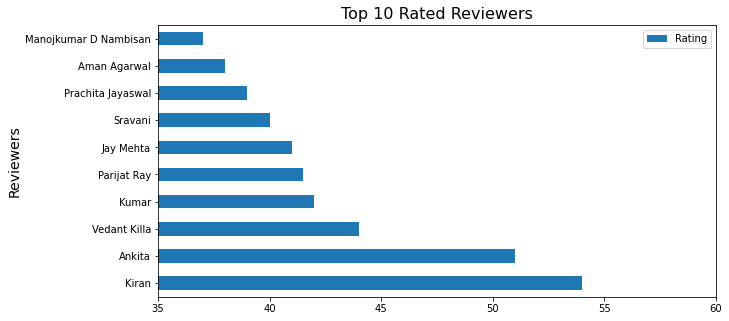

In [38]:
#plotting the data of top reviewers
top_10.plot(kind='barh', xlim=(35, 60), figsize=(10, 5))
plt.title('Top 10 Rated Reviewers', size=16)
plt.ylabel('Reviewers', size=14)
plt.show()

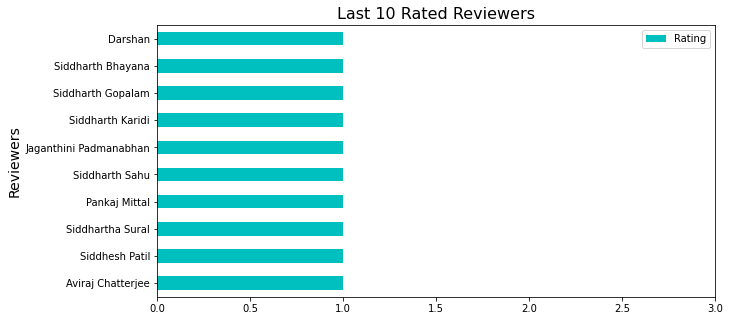

In [39]:
#least reviewers
last_10 = top_reviewers[-10:]
last_10.plot(kind='barh', xlim=(0, 3), figsize=(10, 5), color='c')
plt.title('Last 10 Rated Reviewers', size=16)
plt.ylabel('Reviewers', size=14)
plt.show()

In [40]:
def txt_processing(label):
    non_punc = [char for char in label if char not in string.punctuation]
    non_punc = ''.join(non_punc)
    return ' '.join([word for word in non_punc.split() if word.lower() not in stopwords.words('english')])

**Restaurant Names Data Frame**

In [41]:
#loading the zomato restaurant dataset 
names_df = pd.read_csv('Zomato Restaurant names and Metadata.csv')
print('Restaurent names dataframe:')
names_df.head()

Restaurent names dataframe:


,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


**Data Cleaning**

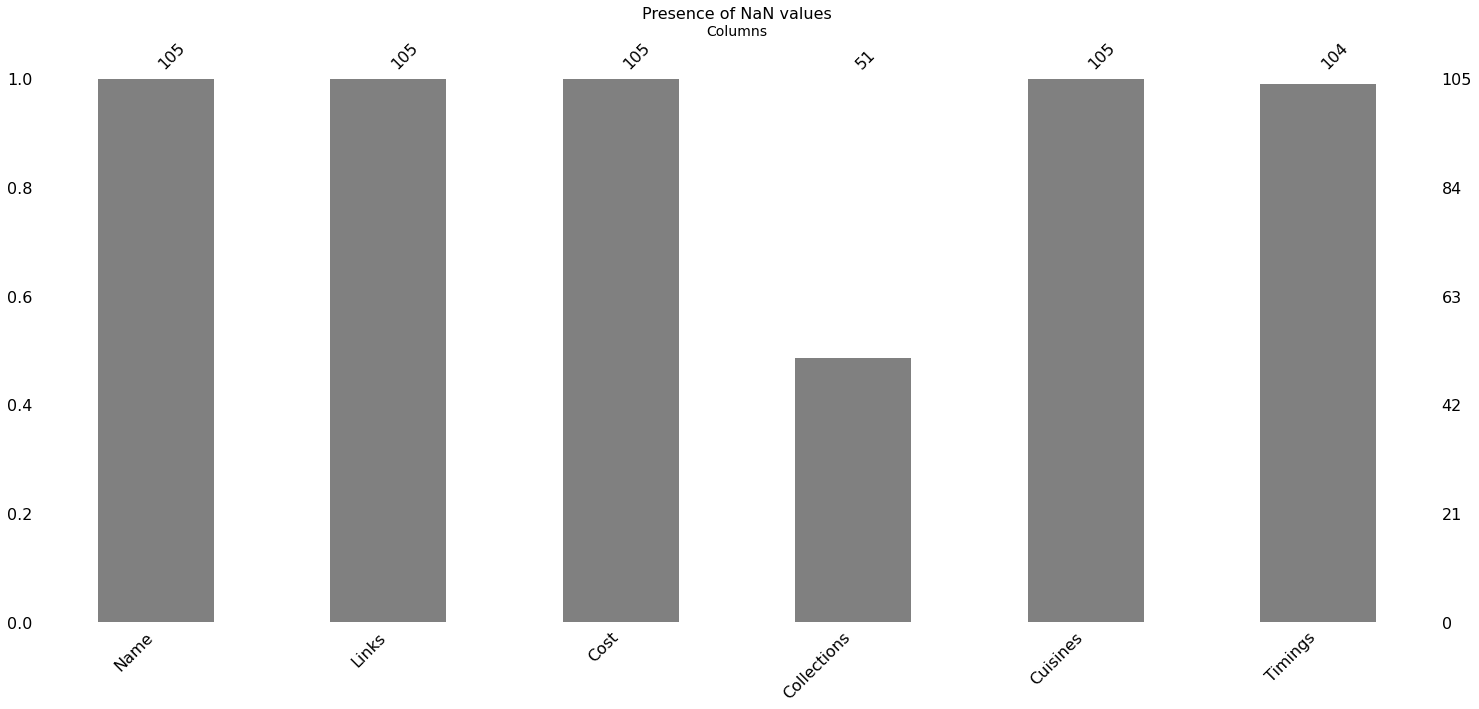

In [42]:
#checking for null values
msno.bar(names_df, color='gray')
plt.title('Presence of NaN values', size=16)
plt.xlabel('Columns', size=14)
plt.show()

**Changing the Cost feature in th dataset**

In [43]:
names_df['Cost'] = names_df['Cost'].str.replace(',','').astype(int)

In [44]:
names_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    int32 
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: int32(1), object(5)
memory usage: 4.6+ KB


In [45]:
names_df.nunique()

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

**Filling the null value in Timings feature**

In [46]:
z = names_df['Timings'].mode()[0]
names_df['Timings'] = names_df['Timings'].fillna(z)
names_df.drop('Collections', axis=1, inplace=True)

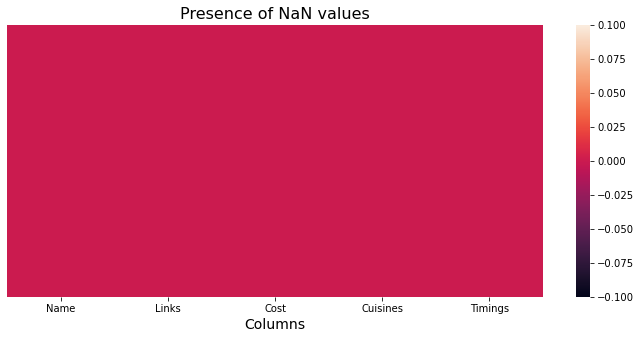

In [47]:
#heatmap of data frame
plt.figure(figsize=(12, 5))
sns.heatmap(names_df.isnull(), yticklabels=False)
plt.title('Presence of NaN values', size=16)
plt.xlabel('Columns', size=14)
plt.show()

In [48]:
names_df.shape

(105, 5)

**Analysis on Cost Feature**

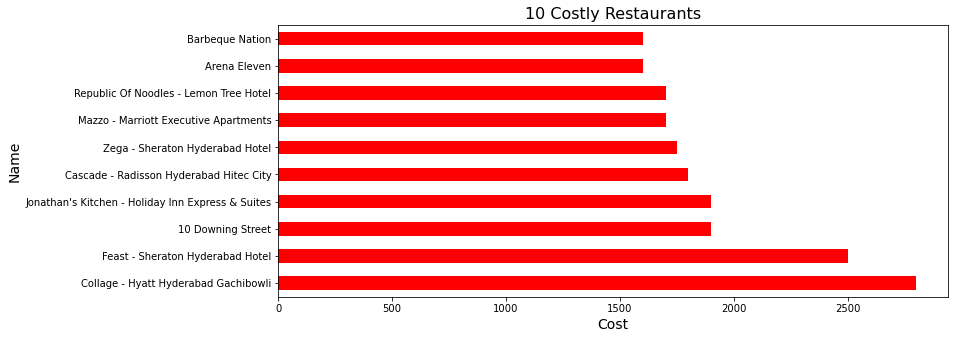

In [49]:
cost = names_df.groupby(['Name'])['Cost'].sum().sort_values(ascending=False)

high_cost = cost.head(10)
high_cost.plot(kind='barh', figsize=(12,5), color='red')
plt.title('10 Costly Restaurants', size=16)
plt.xlabel('Cost', size=14)
plt.ylabel('Name', size=14)
plt.show()

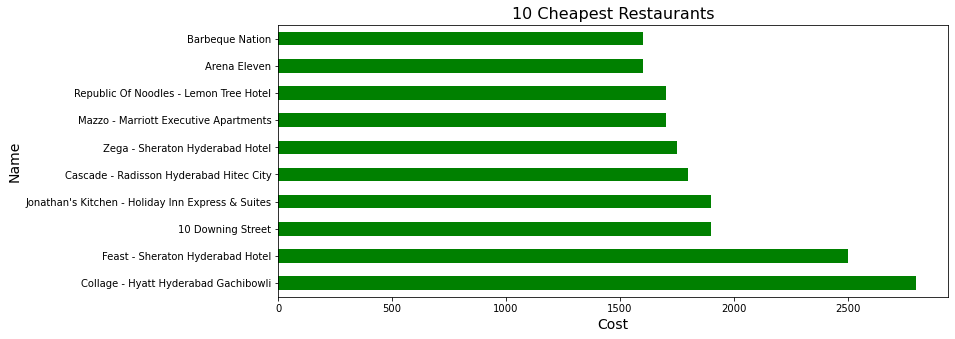

In [50]:
low_cost = cost.head(10)
low_cost.plot(kind='barh', figsize=(12,5), color='green')
plt.title('10 Cheapest Restaurants', size=16)
plt.xlabel('Cost', size=14)
plt.ylabel('Name', size=14)
plt.show()